# Introduction to CV2 and Image Processing

## Basic Setup and Cloning the repository

In [3]:
!git clone https://github.com/vanshg1729/cvit-workshop-2024.git

Cloning into 'cvit-workshop-2024'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 63 (delta 6), reused 60 (delta 6), pack-reused 0
Receiving objects: 100% (63/63), 4.71 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [4]:
import os
import sys

REPO_DIR = "/content/cvit-workshop-2024"
assert os.path.exists(REPO_DIR), f"{REPO_DIR} does not exists"

IMAGES_DIR = os.path.join(REPO_DIR, "day1/images")
print(f"{IMAGES_DIR}, exists = {os.path.exists(IMAGES_DIR)}")

/content/cvit-workshop-2024/day1/images, exists = True


In [5]:
# Importing basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## OpenCV

### Introduction
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.
[https://opencv.org/about/]

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/OpenCV_Logo_with_text_svg_version.svg" alt="opencv logo" width="300"/>

### Basic usage
- opening images using cv2 and plotting with plt
- converting from BGR to RGB
- converting to Grayscale (using cv2)
- converting to Grayscale (manually)

### Opening images using OpenCV
1. Open any image from the `images` directory and print the python datatype of the image read and print the image size, also print the image variable

Type of cv2 read img: <class 'numpy.ndarray'>
Shape of img: (250, 500, 3)


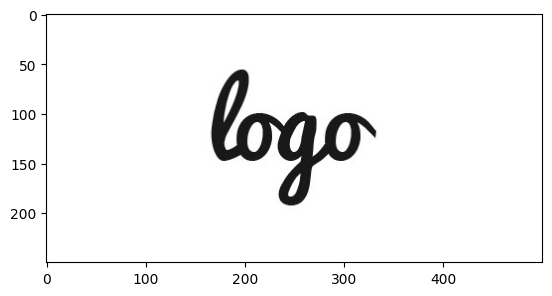

In [9]:
img_paths = os.path.join(IMAGES_DIR, "logo.png")

img = cv2.imread(img_paths)
print(f"Type of cv2 read img: {type(img)}")
print(f"Shape of img: {img.shape}")

plt.imshow(img)

/content/cvit-workshop-2024/day1/images/lena.png True
Type of cv2 read img: <class 'numpy.ndarray'>
Shape of img: (512, 512, 3)


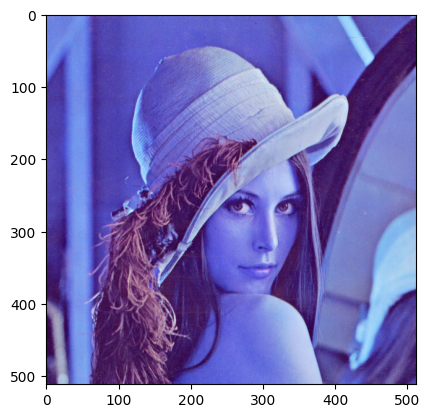

In [11]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
print(img_path, os.path.exists(img_path))

img1 = cv2.imread(img_path)
print(f"Type of cv2 read img: {type(img1)}")
print(f"Shape of img: {img1.shape}")

plt.imshow(img1)

### Converting from BGR to RGB
Do you see anything off in the image displayed previously. Now try converting the image to RGB and then display it

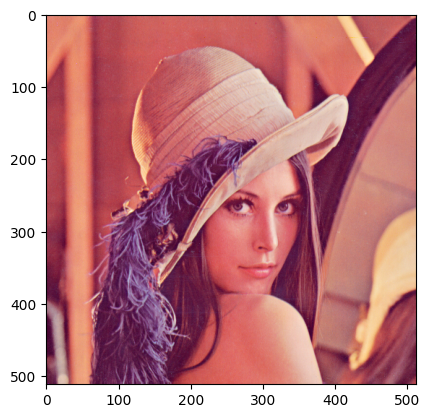

In [12]:
# Write your solution here
image_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

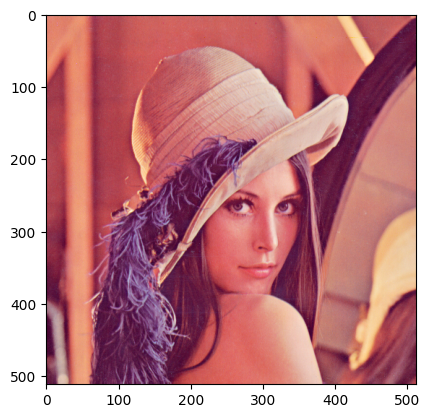

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

### Converting to Grayscale (using OpenCV)
Now convert the image to grayscale using cv2 display it

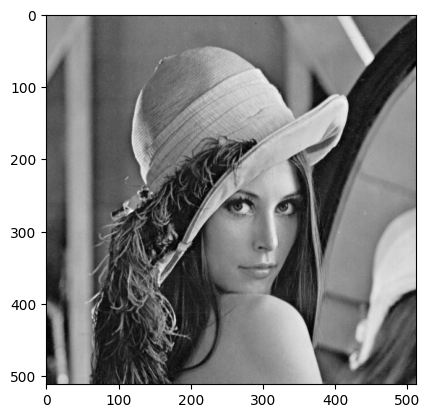

In [16]:
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

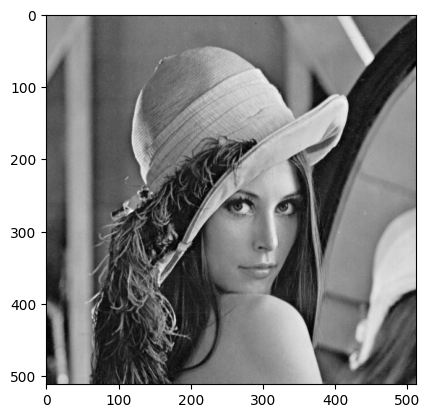

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# By default matplotlib assumes 3 channels (RGB) of an image
# So you need it change the colormap to gray to display grayscale images
plt.imshow(img_gray, cmap='gray')

### Converting to Grayscale (manually)
Now convert the image to grayscale without using CV2.

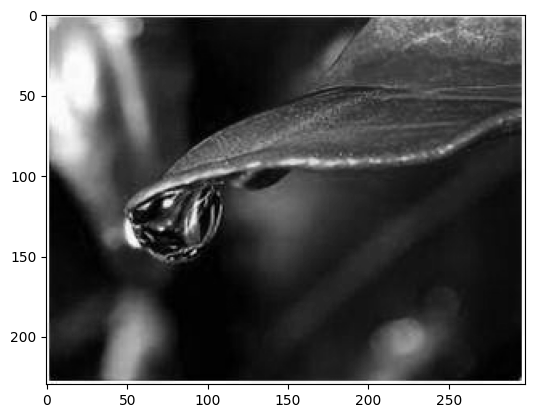

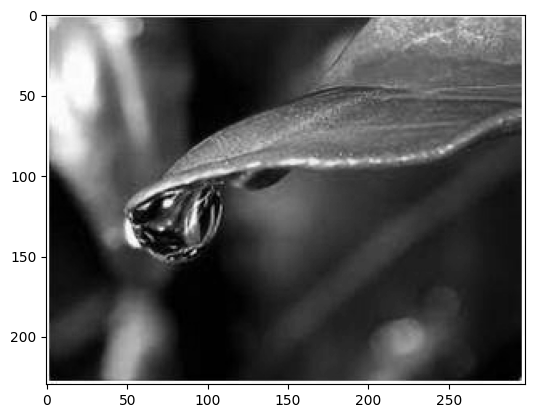

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "leaf.jpg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mean gray conversion
img_gray_mean = img[:, :, 0]/3 + img[:, :, 1]/3 + img[:, :, 2]/3
img_gray_mean = img_gray_mean.astype(np.int32).clip(0, 255)
plt.imshow(img_gray_mean, cmap='gray')
plt.show()

# More color accurate grayscaling for humans
img_gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
img_gray = img_gray.astype(np.int32).clip(0, 255)
plt.imshow(img_gray, cmap='gray')
plt.show()


## Basic Image Processing


### Image Histograms
Construct a frequency histogram for each color channel of `bell.jpg`. You can use `plt.bar` for plotting the histogram

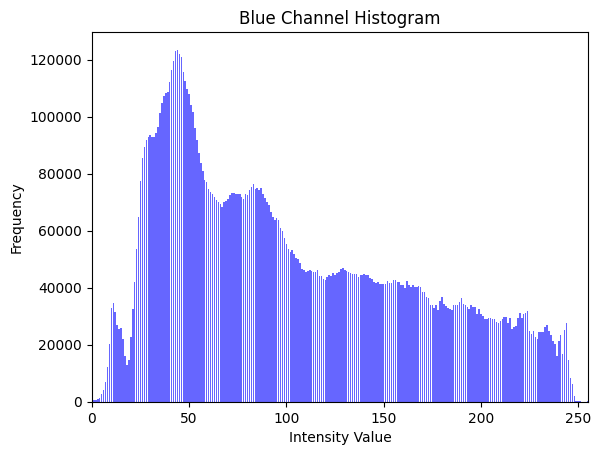

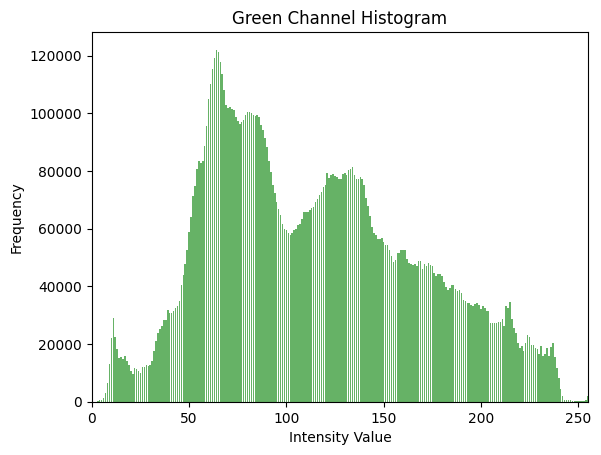

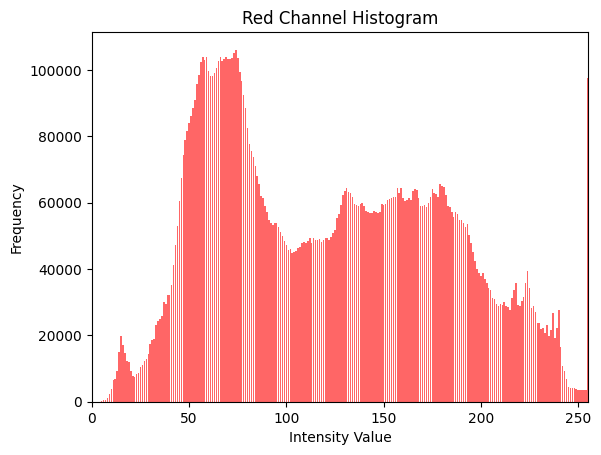

In [22]:
img_paths = os.path.join(IMAGES_DIR, "bell.jpeg")
img = cv2.imread(img_paths)
channels = cv2.split(img)
colors = ('b', 'g', 'r')
channel_names = ('Blue', 'Green', 'Red')

for (channel, color, name) in zip(channels, colors, channel_names):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.figure()
    plt.bar(range(256), hist.ravel(), color=color, alpha=0.6)
    plt.title(f'{name} Channel Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.show()




(2848, 4288, 3)
min value : 0, max_value = 255
(256,)


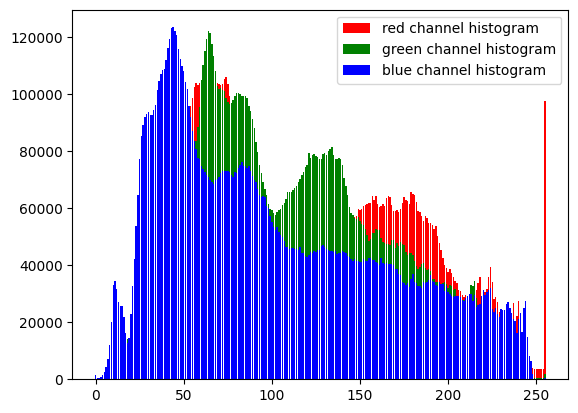

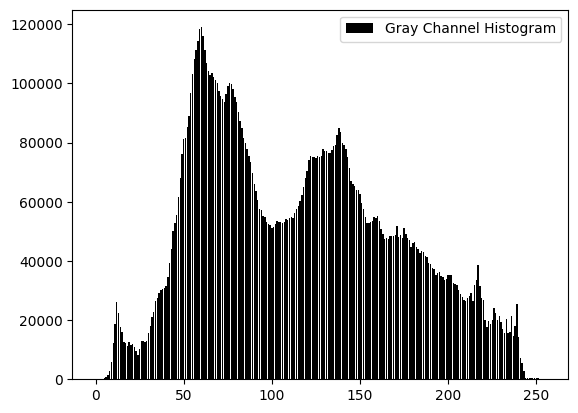

In [20]:
#@title Solution

img = cv2.imread(os.path.join(IMAGES_DIR, "bell.jpeg"))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
print(f"min value : {np.min(img)}, max_value = {np.max(img)}")

# histogram for Red channel
red_freq = np.bincount(img[:, :, 0].flatten())
print(red_freq.shape)

plt.bar(list(range(256)), red_freq, color='red', label='red channel histogram')

# histogram for Green channel
green_freq = np.bincount(img[:, :, 1].flatten())
plt.bar(list(range(256)), green_freq, color='green', label='green channel histogram')

# histogram for Blue channel
blue_freq = np.bincount(img[:, :, 2].flatten())
plt.bar(list(range(256)), blue_freq, color='blue', label='blue channel histogram')

plt.legend()
plt.show()

# histogram for Grayscale Image
gray_freq = np.bincount(img_gray.flatten())
plt.bar(list(range(256)), gray_freq, color='black', label='Gray Channel Histogram')
plt.legend()
plt.show()

### Thresholding
Try binary thresholding the `numbers.png` at different values to see what happens. Can you find the missing number using thresholding ?

Hint : Plot the histogram for all the non-zero values

**Homework**: Perform thresholding on `sudoko.jpg` and find an apt threshold for it.

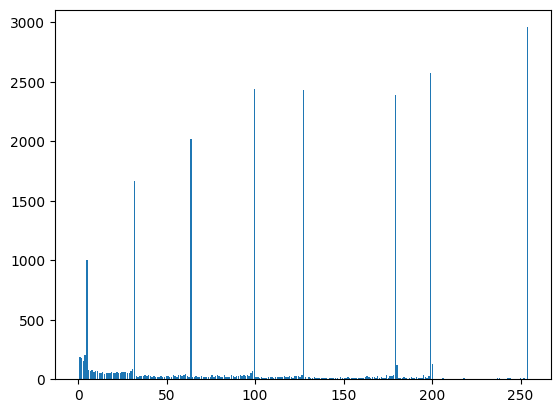

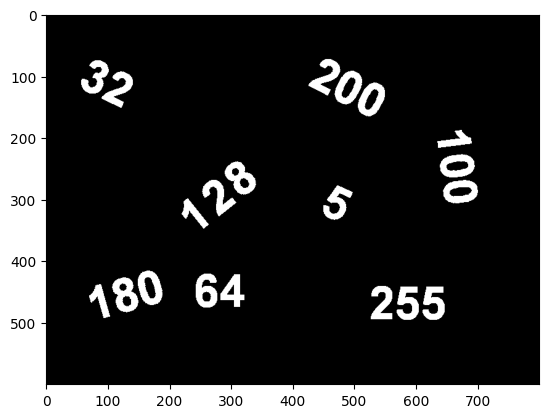

In [45]:
#@title Solution
img = cv2.imread(os.path.join(IMAGES_DIR, "numbers.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plotting histogram of non-zero values
img_nonzero = img[img > 0]

hist, bins = np.histogram(img_nonzero, bins=256, range=(0, 255))
plt.bar(bins[:-1], hist)
plt.show()

# Thresholding at a value
thresh_value = 1
img_thresh = np.where((img >= thresh_value), 255, 0)

plt.imshow(img_thresh, cmap='gray')
plt.show()


In [ ]:
#@title Solution
img = cv2.imread(os.path.join(IMAGES_DIR, "numbers.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plotting histogram of non-zero values
img_nonzero = img[img > 0]
hist, bins = np.histogram(img_nonzero, bins=256, range=(0, 255))
plt.bar(bins[:-1], hist)
plt.show()

# Thresholding at a value
thresh_value = 180
img_thresh = np.where((img >= thresh_value), 255, 0)

plt.imshow(img_thresh, cmap='gray')
plt.show()


### Chroma Keying
**Take `fg.jpg` foreground image and put it on `bg.jpg`**.

Can you vectorize the whole operation to make it fast ?

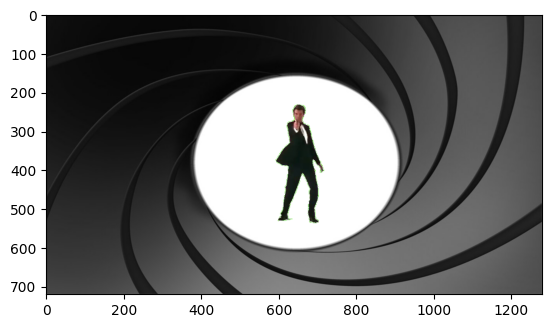

In [41]:
img = cv2.imread(os.path.join(IMAGES_DIR, "fg.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(os.path.join(IMAGES_DIR, "bg.jpg"))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
l = np.array([0, 100,0])
u = np.array([120, 255, 100])
image_copy = np.copy(img)
mask = cv2.inRange(image_copy, l, u)
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
img2[mask == 0] = [0, 0, 0]
img2=img2+masked_image
plt.imshow(img2)

### Emboss (3D Effect)

This is how the input `logo.png` looks like <br/>
![Input Logo](https://i.imgur.com/dF9f1hW.jpeg)


Can you convert it to something which looks like `logoemb.png`
![Embossed Logo](https://i.imgur.com/VZ9PrXU.png)



In [49]:
img = cv2.imread(os.path.join(IMAGES_DIR, "logo.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_nonzero = img[img > 0]


[255 255 255 ... 255 255 255]


### Barbie Needs YOU, KEN!!!
This is how Barbie looks like without Ken (`barbie_flat.png`): <br/>
<img src="https://i.imgur.com/SZb78XR.png" alt="Barbie Flat" width="600"/>
<br/>

This is how you have to make Barbie look like (`barbie_corrected.png`) <br/>
<img src="https://i.imgur.com/lfprTts.png" alt="Barbie Corrected" width="600"/>

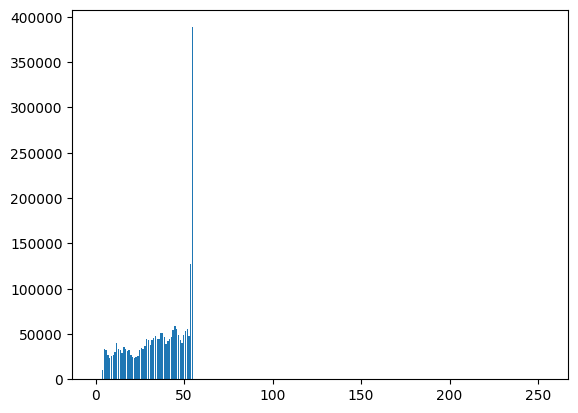

In [55]:
img_paths = os.path.join(IMAGES_DIR, "barbie_flat.png")
img = cv2.imread(img_paths)
img_nonzero = img[img > 0]

hist, bins = np.histogram(img_nonzero, bins=256, range=(0, 255))
plt.bar(bins[:-1], hist)
plt.show()





### Retro Effect

Take `cycle.png` image: <br/>
<img src="https://i.imgur.com/BAifBji.jpeg" alt="cycle" width="600"/>
<br/>

Add a retro effect to it <br/>
<img src="https://i.imgur.com/wxkC03C.png" alt="cycle retro" width="600"/>